In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

In [2]:
# Dataframe
df = pd.read_csv(r"C:\Users\computer\Downloads\Medications_image.csv")
        
df.head()

,Respondent_Serial,Brand,Description
0,10,Fostair,Small particle size .
1,10,Seretide,Those using ventilin and this has been around...
2,10,Symbicort,2nd line after Saba .
3,11,Fostair,""" cost effective . formoterol is excellent L..."
4,11,Relvar,once daily . cost effective . does not come...


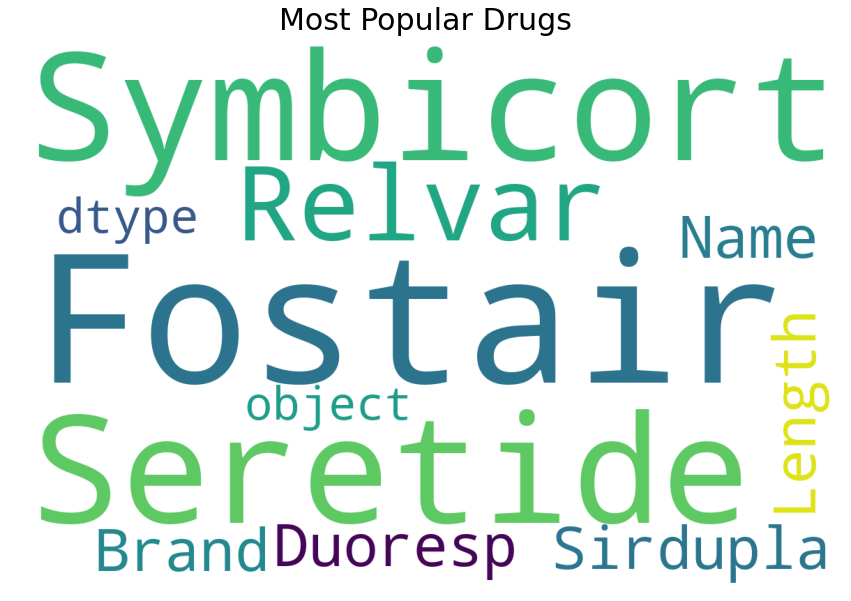

In [3]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(df['Brand']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most Popular Drugs', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [4]:
df.loc[4,'Description']

' once daily .  cost effective .  does not come as mdi .    '

In [5]:
# function to preprocess speech
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

# preprocessing speeches
df['Speech_clean'] = df['Description'].apply(clean)

In [6]:
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

# sentences
df['sent'] = df['Speech_clean'].apply(sentences)

In [7]:
df.head()

,Respondent_Serial,Brand,Description,Speech_clean,sent
0,10,Fostair,Small particle size .,Small particle size .,"[ Small particle size , ]"
1,10,Seretide,Those using ventilin and this has been around...,Those using ventilin and this has been around...,[ Those using ventilin and this has been aroun...
2,10,Symbicort,2nd line after Saba .,2nd line after Saba .,"[ 2nd line after Saba , ]"
3,11,Fostair,""" cost effective . formoterol is excellent L...",cost effective . formoterol is excellent LA...,"[ cost effective , formoterol is excellent ..."
4,11,Relvar,once daily . cost effective . does not come...,once daily . cost effective . does not come...,"[ once daily , cost effective , does not c..."


In [8]:
df2 = pd.DataFrame(columns=['Sent','Respondent_Serial','Brand','Len'])

row_list = []

for i in range(len(df)):
    for sent in df.loc[i,'sent']:
    
        wordcount = len(sent.split())
        Respondent_Serial = df.loc[i,'Respondent_Serial']
        Brand = df.loc[i,'Brand']
        dict1 = {'Respondent_Serial':Respondent_Serial,'Brand':Brand,'Sent':sent,'Len':wordcount}
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [9]:
df2.head()

,Respondent_Serial,Brand,Sent,Len
0,10,Fostair,Small particle size,3
1,10,Fostair,,0
2,10,Seretide,Those using ventilin and this has been around...,17
3,10,Seretide,,0
4,10,Symbicort,2nd line after Saba,4


In [10]:
df2.shape

(1726, 4)

In [11]:
pip install visualise_spacy_tree

In [12]:
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [13]:
def prog_sent(text):
    
    patterns = [r'\b(?i)'+'device'+r'\b',
                r'\b(?i)'+'cost'+r'\b',
                r'\b(?i)'+'use'+r'\b',
                r'\b(?i)'+'patient'+r'\b',
                r'\b(?i)'+'good'+r'\b',
                r'\b(?i)'+'effective'+r'\b',
                r'\b(?i)'+'inhaler'+r'\b',
                r'\b(?i)'+'used'+r'\b',
                r'\b(?i)'+'like'+r'\b',
                r'\b(?i)'+'asthma'+r'\b',
                r'\b(?i)'+'well'+r'\b',
                r'\b(?i)'+'expensive'+r'\b',
                r'\b(?i)'+'formulary'+r'\b',
                r'\b(?i)'+'easy'+r'\b',
                r'\b(?i)'+'mdi'+r'\b',
                r'\b(?i)'+'product'+r'\b',
                r'\b(?i)'+'available'+r'\b',
                r'\b(?i)'+'seretide'+r'\b',
                r'\b(?i)'+'cheaper'+r'\b',
                r'\b(?i)'+'local'+r'\b',
                r'\b(?i)'+'new'+r'\b',
                r'\b(?i)'+'smart'+r'\b',
                r'\b(?i)'+'treatment'+r'\b',
                r'\b(?i)'+'symbicort'+r'\b',
                r'\b(?i)'+'drug'+r'\b',
                r'\b(?i)'+'experience'+r'\b',
                r'\b(?i)'+'choice'+r'\b',
                r'\b(?i)'+'combination'+r'\b',
                r'\b(?i)'+'first'+r'\b',
                r'\b(?i)'+'line'+r'\b',
                r'\b(?i)'+'long'+r'\b',
                r'\b(?i)'+'ccg'+r'\b',
                r'\b(?i)'+'would'+r'\b',
                r'\b(?i)'+'established'+r'\b',
                r'\b(?i)'+'copd'+r'\b',
                r'\b(?i)'+'laba'+r'\b',
                r'\b(?i)'+'different'+r'\b',
                r'\b(?i)'+'ic'+r'\b',
                r'\b(?i)'+'price'+r'\b',
                r'\b(?i)'+'one'+r'\b',
                r'\b(?i)'+'brand'+r'\b',
                r'\b(?i)'+'ics_laba'+r'\b',
                r'\b(?i)'+'using'+r'\b',
                r'\b(?i)'+'steroid'+r'\b',
                r'\b(?i)'+'dose'+r'\b',
                r'\b(?i)'+'familiar'+r'\b',
                r'\b(?i)'+'prescribing'+r'\b',
                r'\b(?i)'+'delivery'+r'\b',
                r'\b(?i)'+'known'+r'\b',
                r'\b(?i)'+'effect'+r'\b',
                r'\b(?i)'+'guideline'+r'\b',
                r'\b(?i)'+'therapy'+r'\b',
                r'\b(?i)'+'type'+r'\b',
                r'\b(?i)'+'cheap'+r'\b',
                r'\b(?i)'+'option'+r'\b',
                r'\b(?i)'+'step'+r'\b',
                r'\b(?i)'+'much'+r'\b',
                r'\b(?i)'+'le'+r'\b',
                r'\b(?i)'+'alternative'+r'\b',
                r'\b(?i)'+'medication'+r'\b',
                r'\b(?i)'+'tried'+r'\b',
                r'\b(?i)'+'turbohaler'+r'\b',
                r'\b(?i)'+'suitable'+r'\b',
                r'\b(?i)'+'many'+r'\b',
                r'\b(?i)'+'useful'+r'\b',
                r'\b(?i)'+'nothing'+r'\b',
                r'\b(?i)'+'exacerbation'+r'\b',
                r'\b(?i)'+'prescribe'+r'\b',
                r'\b(?i)'+'work'+r'\b',
                r'\b(?i)'+'seem'+r'\b',
                r'\b(?i)'+'familiarity'+r'\b',
                r'\b(?i)'+'controlled'+r'\b',
                r'\b(?i)'+'need'+r'\b',
                r'\b(?i)'+'time'+r'\b',
                r'\b(?i)'+'acting'+r'\b',
                r'\b(?i)'+'pneumonia'+r'\b',
                r'\b(?i)'+'particle'+r'\b',
                r'\b(?i)'+'side'+r'\b',
                r'\b(?i)'+'powder'+r'\b',
                r'\b(?i)'+'compliance'+r'\b',
                r'\b(?i)'+'size'+r'\b',
                r'\b(?i)'+'inhaled'+r'\b',
                r'\b(?i)'+'system'+r'\b',
                r'\b(?i)'+'3'+r'\b',
                r'\b(?i)'+'dry'+r'\b',
                r'\b(?i)'+'dosing'+r'\b',
                r'\b(?i)'+'due'+r'\b',
                r'\b(?i)'+'molecule'+r'\b',
                r'\b(?i)'+'old'+r'\b',
                r'\b(?i)'+'generic'+r'\b',
                r'\b(?i)'+'_'+r'\b',
                r'\b(?i)'+'newer'+r'\b',
                r'\b(?i)'+'fostair'+r'\b',
                r'\b(?i)'+'reliable'+r'\b',
                r'\b(?i)'+'dos'+r'\b',
                r'\b(?i)'+'2'+r'\b',
                r'\b(?i)'+'control'+r'\b',
                r'\b(?i)'+'better'+r'\b',
                r'\b(?i)'+'daily'+r'\b',
                r'\b(?i)'+'really'+r'\b',
                r'\b(?i)'+'lot'+r'\b',
                r'\b(?i)'+'trusted'+r'\b',
                r'\b(?i)'+'costly'+r'\b',
                r'\b(?i)'+'low'+r'\b',
                r'\b(?i)'+'problem'+r'\b',
                r'\b(?i)'+'reduces'+r'\b',
                r'\b(?i)'+'compared'+r'\b',
                r'\b(?i)'+'prefer'+r'\b',
                r'\b(?i)'+'tested'+r'\b',
                r'\b(?i)'+'stage'+r'\b',
                r'\b(?i)'+'similar'+r'\b',
                r'\b(?i)'+'restriction'+r'\b',
                r'\b(?i)'+'also'+r'\b',
                r'\b(?i)'+'people'+r'\b',
                r'\b(?i)'+'around'+r'\b',
                r'\b(?i)'+'second'+r'\b',
                r'\b(?i)'+'high'+r'\b',
                r'\b(?i)'+'seems'+r'\b',
                r'\b(?i)'+'year'+r'\b',
                r'\b(?i)'+'term'+r'\b',
                r'\b(?i)'+'sirdupla'+r'\b',
                r'\b(?i)'+'get'+r'\b',
                r'\b(?i)'+'switch'+r'\b',
                r'\b(?i)'+'risk'+r'\b',
                r'\b(?i)'+'encouraged'+r'\b',
                r'\b(?i)'+'market'+r'\b',
                r'\b(?i)'+'lower'+r'\b',
                r'\b(?i)'+'standard'+r'\b',
                r'\b(?i)'+'small'+r'\b',
                r'\b(?i)'+'suit'+r'\b',
                r'\b(?i)'+'great'+r'\b',
                r'\b(?i)'+'formoterol'+r'\b',
                r'\b(?i)'+'prescribed'+r'\b',
                r'\b(?i)'+'breath'+r'\b',
                r'\b(?i)'+'pt'+r'\b',
                r'\b(?i)'+'maintenance'+r'\b',
                r'\b(?i)'+'increase'+r'\b',
                r'\b(?i)'+'reliever'+r'\b',
                r'\b(?i)'+'combo'+r'\b',
                r'\b(?i)'+'range'+r'\b',
                r'\b(?i)'+'dpi'+r'\b',
                r'\b(?i)'+'longer'+r'\b',
                r'\b(?i)'+'fast'+r'\b',
                r'\b(?i)'+'think'+r'\b',
                r'\b(?i)'+'comfortable'+r'\b',
                r'\b(?i)'+'hence'+r'\b',
                r'\b(?i)'+'saba'+r'\b',
                r'\b(?i)'+'recommended'+r'\b',
                r'\b(?i)'+'come'+r'\b',
                r'\b(?i)'+'surgery'+r'\b',
                r'\b(?i)'+'limited'+r'\b',
                r'\b(?i)'+'data'+r'\b',
                r'\b(?i)'+'issue'+r'\b',
                r'\b(?i)'+'efficacy'+r'\b',
                r'\b(?i)'+'clinical'+r'\b',
                r'\b(?i)'+'symptom'+r'\b',
                r'\b(?i)'+'benefit'+r'\b',
                r'\b(?i)'+'track'+r'\b',
                r'\b(?i)'+'spacer'+r'\b',
                r'\b(?i)'+'regime'+r'\b',
                r'\b(?i)'+'deal'+r'\b',
                r'\b(?i)'+'1st'+r'\b',
                r'\b(?i)'+'preferred'+r'\b',
                r'\b(?i)'+'others'+r'\b',
                r'\b(?i)'+'adult'+r'\b',
                r'\b(?i)'+'record'+r'\b',
                r'\b(?i)'+'however'+r'\b',
                r'\b(?i)'+'2nd'+r'\b',
                r'\b(?i)'+'ease'+r'\b',
                r'\b(?i)'+'increased'+r'\b',
                r'\b(?i)'+'nexthaler'+r'\b',
                r'\b(?i)'+'concern'+r'\b',
                r'\b(?i)'+'relatively'+r'\b',
                r'\b(?i)'+'dispensing'+r'\b',
                r'\b(?i)'+'component'+r'\b',
                r'\b(?i)'+'flexible'+r'\b',
                r'\b(?i)'+'onset'+r'\b',
                r'\b(?i)'+'usually'+r'\b',
                r'\b(?i)'+'another'+r'\b',
                r'\b(?i)'+'original'+r'\b']

    output = []
    flag = 0
    
    # Look for patterns in the text
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# Apply function
df2['Check_Schemes'] = df2['Sent'].apply(prog_sent)

<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expression '\\b(?i)device\\b'
  if re.search(pat, text) != None:
<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expression '\\b(?i)cost\\b'
  if re.search(pat, text) != None:
<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expression '\\b(?i)use\\b'
  if re.search(pat, text) != None:
<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expression '\\b(?i)patient\\b'
  if re.search(pat, text) != None:
<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expression '\\b(?i)good\\b'
  if re.search(pat, text) != None:
<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expression '\\b(?i)effective\\b'
  if re.search(pat, text) != None:
<ipython-input-13-fd19b218d2b5>:189: DeprecationWarning: Flags not at the start of the expr

In [14]:
count = 0
for i in range(len(df2)):
    if df2.loc[i,'Check_Schemes'] == 1:
        count+=1
print(count)

1127


In [15]:
def all_schemes(text,check):
    
    schemes = []
    
    doc = nlp(text)
    
    # Initiatives keywords
    prog_list = ['device','cost','use','patient','good','effective','inhaler','used','like','asthma','well','expensive',
                 'formulary','easy','mdi','product','available','seretide','cheaper','local','new','smart','treatment',
                 'symbicort','drug','experience','choice','combination','first','line','long','ccg','would','established',
                 'copd','laba','different','ic','price','one','brand','ics_laba','using','steroid','dose','familiar',
                 'prescribing','delivery','known','effect','guideline','therapy','type','cheap','option','step','much','le',
                 'alternative','medication','tried','turbohaler','suitable','many','useful','nothing','exacerbation',
                 'prescribe','work','seem','familiarity','controlled','need','time','acting','pneumonia','particle','side',
                 'powder','compliance','size','inhaled','system','3','dry','dosing','due','molecule','old','generic',
                 'newer','fostair','reliable','dos','2','control','better','daily','really','lot','trusted','costly','low',
                 'problem','reduces','compared','prefer','tested','stage','similar','restriction','also','people','around',
                 'second','high','seems','year','term','sirdupla','get','switch','risk','encouraged','market','lower',
                 'standard','small','suit','great','formoterol','prescribed','breath','pt','maintenance','increase','reliever',
                 'combo','range','dpi','longer','fast','think','comfortable','hence','saba','recommended','come','surgery',
                 'limited','data','issue','efficacy','clinical','symptom','benefit','track','spacer','regime','deal','1st',
                 'preferred','others','adult','record','however','2nd','ease','increased','nexthaler','concern','relatively',
                 'dispensing','component','flexible','onset','usually','another','original']
    
    # Define pattern to match initiatives names 
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]
    
    if check == 0:
        # return blank list
        return schemes

    # Matcher class object 
    matcher = Matcher(nlp.vocab) 
    matcher.add("matching", [pattern], on_match=None) 
    matches = matcher(doc)

    for i in range(0,len(matches)):
        
        # match: id, start, end
        start, end = matches[i][1], matches[i][2]
        
        if doc[start].pos_=='DET':
            start = start+1
        
        # matched string
        span = str(doc[start:end])
        
        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)
        
    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sent,x.Check_Schemes),axis=1)

In [16]:
count = 0
for i in range(len(df2)):
    if len(df2.loc[i,'Schemes1'])!=0:
        count+=1
print(count)

0


In [17]:
#Respondent_Serial = ''
for i in range(len(df2)):
    if df2.loc[i,'Respondent_Serial']==Respondent_Serial:
        if len(df2.loc[i,'Schemes1'])!=0:
            print('->',df2.loc[i,'Respondent_Serial'],',',df2.loc[i,'Schemes1'],':')
            print(df2.loc[i,'Sent'])

In [18]:
def sent_subtree(text):
    
    # pattern match for schemes or initiatives
    patterns = [r'\b(?i)'+'device'+r'\b',
                r'\b(?i)'+'cost'+r'\b',
                r'\b(?i)'+'use'+r'\b',
                r'\b(?i)'+'patient'+r'\b',
                r'\b(?i)'+'good'+r'\b',
                r'\b(?i)'+'effective'+r'\b',
                r'\b(?i)'+'inhaler'+r'\b',
                r'\b(?i)'+'used'+r'\b',
                r'\b(?i)'+'like'+r'\b',
                r'\b(?i)'+'asthma'+r'\b',
                r'\b(?i)'+'well'+r'\b',
                r'\b(?i)'+'expensive'+r'\b',
                r'\b(?i)'+'formulary'+r'\b',
                r'\b(?i)'+'easy'+r'\b',
                r'\b(?i)'+'mdi'+r'\b',
                r'\b(?i)'+'product'+r'\b',
                r'\b(?i)'+'available'+r'\b',
                r'\b(?i)'+'seretide'+r'\b',
                r'\b(?i)'+'cheaper'+r'\b',
                r'\b(?i)'+'local'+r'\b',
                r'\b(?i)'+'new'+r'\b',
                r'\b(?i)'+'smart'+r'\b',
                r'\b(?i)'+'treatment'+r'\b',
                r'\b(?i)'+'symbicort'+r'\b',
                r'\b(?i)'+'drug'+r'\b',
                r'\b(?i)'+'experience'+r'\b',
                r'\b(?i)'+'choice'+r'\b',
                r'\b(?i)'+'combination'+r'\b',
                r'\b(?i)'+'first'+r'\b',
                r'\b(?i)'+'line'+r'\b',
                r'\b(?i)'+'long'+r'\b',
                r'\b(?i)'+'ccg'+r'\b',
                r'\b(?i)'+'would'+r'\b',
                r'\b(?i)'+'established'+r'\b',
                r'\b(?i)'+'copd'+r'\b',
                r'\b(?i)'+'laba'+r'\b',
                r'\b(?i)'+'different'+r'\b',
                r'\b(?i)'+'ic'+r'\b',
                r'\b(?i)'+'price'+r'\b',
                r'\b(?i)'+'one'+r'\b',
                r'\b(?i)'+'brand'+r'\b',
                r'\b(?i)'+'ics_laba'+r'\b',
                r'\b(?i)'+'using'+r'\b',
                r'\b(?i)'+'steroid'+r'\b',
                r'\b(?i)'+'dose'+r'\b',
                r'\b(?i)'+'familiar'+r'\b',
                r'\b(?i)'+'prescribing'+r'\b',
                r'\b(?i)'+'delivery'+r'\b',
                r'\b(?i)'+'known'+r'\b',
                r'\b(?i)'+'effect'+r'\b',
                r'\b(?i)'+'guideline'+r'\b',
                r'\b(?i)'+'therapy'+r'\b',
                r'\b(?i)'+'type'+r'\b',
                r'\b(?i)'+'cheap'+r'\b',
                r'\b(?i)'+'option'+r'\b',
                r'\b(?i)'+'step'+r'\b',
                r'\b(?i)'+'much'+r'\b',
                r'\b(?i)'+'le'+r'\b',
                r'\b(?i)'+'alternative'+r'\b',
                r'\b(?i)'+'medication'+r'\b',
                r'\b(?i)'+'tried'+r'\b',
                r'\b(?i)'+'turbohaler'+r'\b',
                r'\b(?i)'+'suitable'+r'\b',
                r'\b(?i)'+'many'+r'\b',
                r'\b(?i)'+'useful'+r'\b',
                r'\b(?i)'+'nothing'+r'\b',
                r'\b(?i)'+'exacerbation'+r'\b',
                r'\b(?i)'+'prescribe'+r'\b',
                r'\b(?i)'+'work'+r'\b',
                r'\b(?i)'+'seem'+r'\b',
                r'\b(?i)'+'familiarity'+r'\b',
                r'\b(?i)'+'controlled'+r'\b',
                r'\b(?i)'+'need'+r'\b',
                r'\b(?i)'+'time'+r'\b',
                r'\b(?i)'+'acting'+r'\b',
                r'\b(?i)'+'pneumonia'+r'\b',
                r'\b(?i)'+'particle'+r'\b',
                r'\b(?i)'+'side'+r'\b',
                r'\b(?i)'+'powder'+r'\b',
                r'\b(?i)'+'compliance'+r'\b',
                r'\b(?i)'+'size'+r'\b',
                r'\b(?i)'+'inhaled'+r'\b',
                r'\b(?i)'+'system'+r'\b',
                r'\b(?i)'+'3'+r'\b',
                r'\b(?i)'+'dry'+r'\b',
                r'\b(?i)'+'dosing'+r'\b',
                r'\b(?i)'+'due'+r'\b',
                r'\b(?i)'+'molecule'+r'\b',
                r'\b(?i)'+'old'+r'\b',
                r'\b(?i)'+'generic'+r'\b',
                r'\b(?i)'+'_'+r'\b',
                r'\b(?i)'+'newer'+r'\b',
                r'\b(?i)'+'fostair'+r'\b',
                r'\b(?i)'+'reliable'+r'\b',
                r'\b(?i)'+'dos'+r'\b',
                r'\b(?i)'+'2'+r'\b',
                r'\b(?i)'+'control'+r'\b',
                r'\b(?i)'+'better'+r'\b',
                r'\b(?i)'+'daily'+r'\b',
                r'\b(?i)'+'really'+r'\b',
                r'\b(?i)'+'lot'+r'\b',
                r'\b(?i)'+'trusted'+r'\b',
                r'\b(?i)'+'costly'+r'\b',
                r'\b(?i)'+'low'+r'\b',
                r'\b(?i)'+'problem'+r'\b',
                r'\b(?i)'+'reduces'+r'\b',
                r'\b(?i)'+'compared'+r'\b',
                r'\b(?i)'+'prefer'+r'\b',
                r'\b(?i)'+'tested'+r'\b',
                r'\b(?i)'+'stage'+r'\b',
                r'\b(?i)'+'similar'+r'\b',
                r'\b(?i)'+'restriction'+r'\b',
                r'\b(?i)'+'also'+r'\b',
                r'\b(?i)'+'people'+r'\b',
                r'\b(?i)'+'around'+r'\b',
                r'\b(?i)'+'second'+r'\b',
                r'\b(?i)'+'high'+r'\b',
                r'\b(?i)'+'seems'+r'\b',
                r'\b(?i)'+'year'+r'\b',
                r'\b(?i)'+'term'+r'\b',
                r'\b(?i)'+'sirdupla'+r'\b',
                r'\b(?i)'+'get'+r'\b',
                r'\b(?i)'+'switch'+r'\b',
                r'\b(?i)'+'risk'+r'\b',
                r'\b(?i)'+'encouraged'+r'\b',
                r'\b(?i)'+'market'+r'\b',
                r'\b(?i)'+'lower'+r'\b',
                r'\b(?i)'+'standard'+r'\b',
                r'\b(?i)'+'small'+r'\b',
                r'\b(?i)'+'suit'+r'\b',
                r'\b(?i)'+'great'+r'\b',
                r'\b(?i)'+'formoterol'+r'\b',
                r'\b(?i)'+'prescribed'+r'\b',
                r'\b(?i)'+'breath'+r'\b',
                r'\b(?i)'+'pt'+r'\b',
                r'\b(?i)'+'maintenance'+r'\b',
                r'\b(?i)'+'increase'+r'\b',
                r'\b(?i)'+'reliever'+r'\b',
                r'\b(?i)'+'combo'+r'\b',
                r'\b(?i)'+'range'+r'\b',
                r'\b(?i)'+'dpi'+r'\b',
                r'\b(?i)'+'longer'+r'\b',
                r'\b(?i)'+'fast'+r'\b',
                r'\b(?i)'+'think'+r'\b',
                r'\b(?i)'+'comfortable'+r'\b',
                r'\b(?i)'+'hence'+r'\b',
                r'\b(?i)'+'saba'+r'\b',
                r'\b(?i)'+'recommended'+r'\b',
                r'\b(?i)'+'come'+r'\b',
                r'\b(?i)'+'surgery'+r'\b',
                r'\b(?i)'+'limited'+r'\b',
                r'\b(?i)'+'data'+r'\b',
                r'\b(?i)'+'issue'+r'\b',
                r'\b(?i)'+'efficacy'+r'\b',
                r'\b(?i)'+'clinical'+r'\b',
                r'\b(?i)'+'symptom'+r'\b',
                r'\b(?i)'+'benefit'+r'\b',
                r'\b(?i)'+'track'+r'\b',
                r'\b(?i)'+'spacer'+r'\b',
                r'\b(?i)'+'regime'+r'\b',
                r'\b(?i)'+'deal'+r'\b',
                r'\b(?i)'+'1st'+r'\b',
                r'\b(?i)'+'preferred'+r'\b',
                r'\b(?i)'+'others'+r'\b',
                r'\b(?i)'+'adult'+r'\b',
                r'\b(?i)'+'record'+r'\b',
                r'\b(?i)'+'however'+r'\b',
                r'\b(?i)'+'2nd'+r'\b',
                r'\b(?i)'+'ease'+r'\b',
                r'\b(?i)'+'increased'+r'\b',
                r'\b(?i)'+'nexthaler'+r'\b',
                r'\b(?i)'+'concern'+r'\b',
                r'\b(?i)'+'relatively'+r'\b',
                r'\b(?i)'+'dispensing'+r'\b',
                r'\b(?i)'+'component'+r'\b',
                r'\b(?i)'+'flexible'+r'\b',
                r'\b(?i)'+'onset'+r'\b',
                r'\b(?i)'+'usually'+r'\b',
                r'\b(?i)'+'another'+r'\b',
                r'\b(?i)'+'original'+r'\b']
    
    schemes = []
    doc = nlp(text)
    flag = 0
    # if no initiative present in sentence
    for pat in patterns:
        
        if re.search(pat, text) != None:
            flag = 1
            break
    
    if flag == 0:
        return schemes

    # iterating over sentence tokens
    for token in doc:

        for pat in patterns:
                
            # if we get a pattern match
            if re.search(pat, token.text) != None:

                word = ''
                # iterating over token subtree
                for node in token.subtree:
                    # only extract the proper nouns
                    if (node.pos_ == 'PROPN'):
                        word += node.text+' '

                if len(word)!=0:
                    schemes.append(word)

    return schemes      

# derive initiatives
df2['Schemes2'] = df2['Sent'].apply(sent_subtree)

In [19]:
count = 0
for i in range(len(df2)):
    if len(df2.loc[i,'Schemes2'])!=0:
        count+=1
print(count)

161


In [20]:
for i in range(len(df2)):
    if df2.loc[i,'Respondent_Serial']==Respondent_Serial:
        if len(df2.loc[i,'Schemes2'])!=0:
            print('->',df2.loc[i,'Respondent_Serial'],',',df2.loc[i,'Schemes2'],':')
            print(df2.loc[i,'Sent'])

-> 144 , ['Seretide ', 'Seretide '] :
  Similar to Seretide 


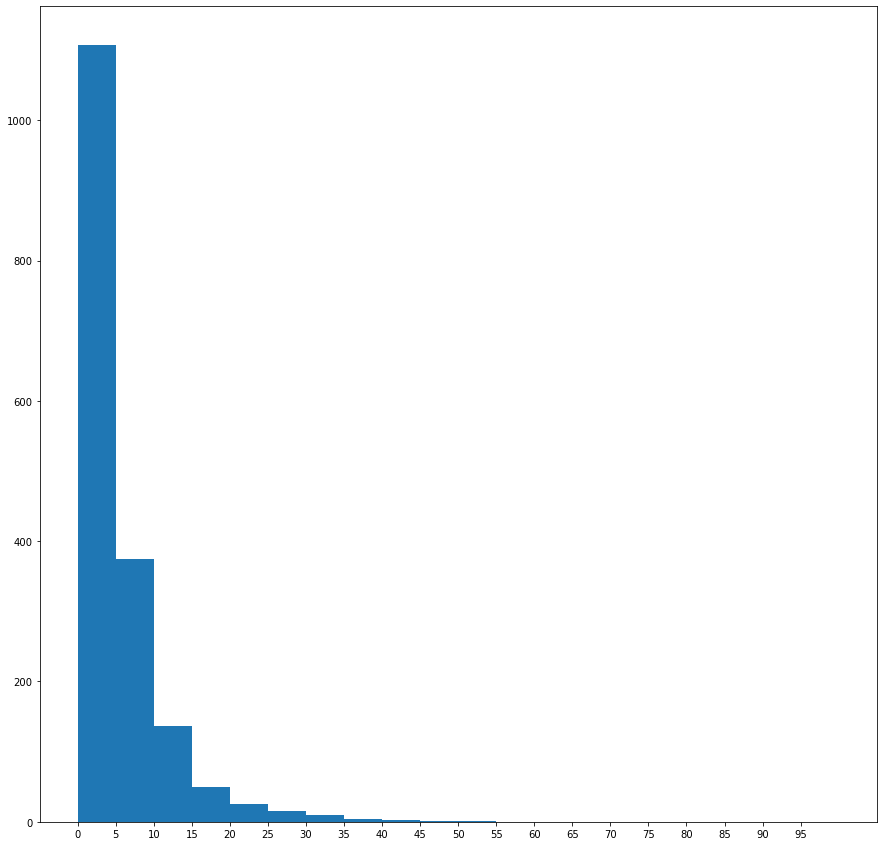

In [21]:
plt.hist(df2['Len'],bins=20,range=[0,100])
plt.xticks(np.arange(0,100,5));

In [22]:
row_list = []
# df2 contains all sentences from all speeches
for i in range(len(df2)):
    sent = df2.loc[i,'Sent']
    
    if (',' not in sent) and (len(sent.split()) <= 70):
        
        Respondent_Serial = df2.loc[i,'Respondent_Serial']
        Brand = df2.loc[i,'Brand']
        length = len(sent.split())
        
        dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Sent':sent,'Len':length}
        row_list.append(dict1)
        
# df with shorter sentences
df3 = pd.DataFrame(columns=['Respondent_Serial','Sent', 'Brand', "Len"])
df3 = pd.DataFrame(row_list)

In [23]:
df3.head()

,Respondent_Serial,Brand,Sent,Len
0,10,Fostair,Small particle size,3
1,10,Fostair,,0
2,10,Seretide,Those using ventilin and this has been around...,17
3,10,Seretide,,0
4,10,Symbicort,2nd line after Saba,4


In [24]:
from random import randint
def rand_sent(df):
    
    index = randint(0, len(df))
    print('Index = ',index)
    doc = nlp(df.loc[index,'Sent'][1:])
    displacy.render(doc, style='dep',jupyter=True)
    
    return index

In [25]:
rand_sent(df3)

Index =  145


145

In [26]:
def output_per(df,out_col):
    
    result = 0
    
    for out in df[out_col]:
        if len(out)!=0:
            result+=1
    
    per = result/len(df)
    per *= 100
    
    return per

In [27]:
from pathlib import Path

text = df3.loc[9,'Sent'][1:]

doc = nlp(text)
img = displacy.render(doc, style='dep',jupyter=True)
img


In [28]:
def rule1(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        
        # If the token is a verb
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # Only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                    
                    # Add subject to the phrase
                    phrase += sub_tok.text

                    # Save the root of the word in phrase
                    phrase += ' '+token.lemma_ 

                    # Check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        # Save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                                    
                            phrase += ' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [29]:
row_list = []

for i in range(len(df3)):
    
    sent = df3.loc[i,'Sent']
    Respondent_Serial = df3.loc[i,'Respondent_Serial']
    output = rule1(sent)
    dict1 = {'Respondent_Serial':Respondent_Serial,'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1 = pd.DataFrame(row_list)

# Rule 1 achieves 20% result on simple sentences
output_per(df_rule1,'Output')

4.015296367112811

In [30]:
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(df2)):
    
    sent = df2.loc[i,'Sent']
    Respondent_Serial = df2.loc[i,'Respondent_Serial']
    output = rule1(sent)
    dict1 = {'Respondent_Serial':Respondent_Serial,'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1_all = pd.DataFrame(row_list)

# Check rule1 output on complete speeches
output_per(df_rule1_all,'Output')

5.098493626882966

In [31]:
df_show = pd.DataFrame(columns=df_rule1_all.columns)

for row in range(len(df_rule1_all)):
    
    if len(df_rule1_all.loc[row,'Output'])!=0:
        df_show = df_show.append(df_rule1_all.loc[row,:])

# reset the index
df_show.reset_index(inplace=True)
df_show.drop('index',axis=1,inplace=True)

In [32]:
df_rule1_all.shape, df_show.shape

((1726, 3), (88, 3))

In [33]:
verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):
    
    # sentence containing the output
    sentence = df_show.loc[i,'Sent']
    # year of the sentence
    Respondent_Serial = df_show.loc[i,'Respondent_Serial']
    # output of the sentence
    output = df_show.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1 = sent.split()[:1]
        v = sent.split()[1]
        n2 = sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sent':sentence,'Respondent_Serial':Respondent_Serial,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [34]:
df_sep.head()

,Sent,Respondent_Serial,Noun1,Verb,Noun2
0,it is useful it works and useful 1st l...,14,[line],combine,[drug]
1,I have alot of experience with symbicort,15,[I],have,[alot]
2,Would have to start using others if wasnt av...,18,[which],cause,[increase]
3,"stage 2_3 asthma , those who have dexterity t...",18,[who],have,[dexterity]
4,Ultrafine particles mean lower dose of ICS f...,20,[particles],mean,[dose]


In [35]:
sort = sorted(verb_dict.items(), key = lambda d:(d[1],d[0]), reverse=True)
# top 10 most used verbs in sentence
sort[:10]

[('have', 20),
 ('use', 10),
 ('like', 10),
 ('reduce', 5),
 ('get', 4),
 ('prefer', 3),
 ('need', 3),
 ('suit', 2),
 ('profile', 2),
 ('inhale', 2)]

In [36]:
df_sep[df_sep['Verb']=='write']

,Sent,Respondent_Serial,Noun1,Verb,Noun2


In [37]:
def rule2(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [38]:
row_list = []

for i in range(len(df3)):
    
    sent = df3.loc[i,'Sent']
    Respondent_Serial = df3.loc[i,'Respondent_Serial']
    Brand = df3.loc[i,'Brand']
    # Rule 2
    output = rule2(sent)
    
    dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Sent':sent,'Output':output}
    row_list.append(dict1)

df_rule2 = pd.DataFrame(row_list)

In [39]:
df_rule2.head()

,Respondent_Serial,Brand,Sent,Output
0,10,Fostair,Small particle size,[]
1,10,Fostair,,[]
2,10,Seretide,Those using ventilin and this has been around...,[]
3,10,Seretide,,[]
4,10,Symbicort,2nd line after Saba,[]


In [40]:
output_per(df_rule2,'Output')

15.806246016571066

In [41]:
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(df2)):
    
    sent = df2.loc[i,'Sent']
    Respondent_Serial = df2.loc[i,'Respondent_Serial']
    Brand = df2.loc[i,'Brand']
    output = rule2(sent)
    dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand,'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule2_all = pd.DataFrame(row_list)

# check rule output on complete speeches
output_per(df_rule2_all,'Output')

19.235225955967554

In [42]:
df_rule2_all.head(10)

,Respondent_Serial,Brand,Sent,Output
0,10,Fostair,Small particle size,[]
1,10,Fostair,,[]
2,10,Seretide,Those using ventilin and this has been around...,[]
3,10,Seretide,,[]
4,10,Symbicort,2nd line after Saba,[]
5,10,Symbicort,,[]
6,11,Fostair,cost effective,[]
7,11,Fostair,formoterol is excellent LABA,[]
8,11,Fostair,cost effective,[]
9,11,Fostair,formoterol is excellent LABA,[]


In [43]:
df_show2 = pd.DataFrame(columns=df_rule2_all.columns)

for row in range(len(df_rule2_all)):
    
    if len(df_rule2_all.loc[row,'Output'])!=0:
        df_show2 = df_show2.append(df_rule2_all.loc[row,:])

# reset the index
df_show2.reset_index(inplace=True)
df_show2.drop('index',axis=1,inplace=True)

In [44]:
df_show2.head(10)
df_show2.to_csv(r"C:\Users\computer\Downloads\Ipsos1.csv")

In [45]:
def rule2_mod(text,index):
    
    doc = nlp(text)

    phrase = ''
    
    for token in doc:
        
        if token.i == index:
            
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ'):
                    phrase += ' '+subtoken.text
            break
    
    return phrase

In [46]:
def rule1_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:
        # root word
        if (token.pos_=='VERB'):
            
            phrase =''
            
            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:
                
                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):
                        
                    adj = rule2_mod(text,sub_tok.i)
                    
                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_ 

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:
                        
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):
                             
                            adj = rule2_mod(text,sub_tok.i)
                            
                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)
            
    return sent

In [47]:
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(df2)):
    
    sent = df2.loc[i,'Sent']
    Respondent_Serial = df2.loc[i,'Respondent_Serial']
    Brand = df2.loc[i, 'Brand']
    output = rule1_mod(sent)
    dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule1_mod_all = pd.DataFrame(row_list)
# check rule1 output on complete speeches
output_per(df_rule1_mod_all,'Output')

5.098493626882966

In [48]:
df_rule1_mod_all.head(20)

,Respondent_Serial,Brand,Sent,Output
0,10,Fostair,Small particle size,[]
1,10,Fostair,,[]
2,10,Seretide,Those using ventilin and this has been around...,[]
3,10,Seretide,,[]
4,10,Symbicort,2nd line after Saba,[]
5,10,Symbicort,,[]
6,11,Fostair,cost effective,[]
7,11,Fostair,formoterol is excellent LABA,[]
8,11,Fostair,cost effective,[]
9,11,Fostair,formoterol is excellent LABA,[]


In [49]:
doc = nlp(text)
img = displacy.render(doc, style='dep',jupyter=True)
img

In [50]:
def rule3(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''
            
            # if its head word is a noun
            if token.head.pos_=='NOUN':
                
                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text
                
                if len(phrase)>2:
                    sent.append(phrase)
                
    return sent

In [51]:
row_list = []

for i in range(len(df3)):
    
    sent = df3.loc[i,'Sent']
    Respondent_Serial = df3.loc[i,'Respondent_Serial']
    Brand = df3.loc[i,'Brand']
    
    # Rule 3
    output = rule3(sent)
    
    dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Sent':sent,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)
# Rule 3 achieves 40% result
output_per(df_rule3,'Output')

12.619502868068832

In [52]:
df_rule3.head(10)

,Respondent_Serial,Brand,Sent,Output
0,10,Fostair,Small particle size,[]
1,10,Fostair,,[]
2,10,Seretide,Those using ventilin and this has been around...,[]
3,10,Seretide,,[]
4,10,Symbicort,2nd line after Saba,[line after Saba]
5,10,Symbicort,,[]
6,11,Fostair,cost effective,[]
7,11,Fostair,formoterol is excellent LABA,[]
8,11,Fostair,cost effective,[]
9,11,Fostair,formoterol is excellent LABA,[]


In [53]:
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(df2)):
    
    sent = df2.loc[i,'Sent']
    Respondent_Serial = df2.loc[i,'Respondent_Serial']
    Brand = df2.loc[i,'Brand']
    output = rule3(sent)  # Output
    dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3_all = pd.DataFrame(row_list)
# check rule1 output on complete speeches
output_per(df_rule3_all,'Output')

15.52723059096176

In [54]:
df_rule3_all.head(10)

,Respondent_Serial,Brand,Sent,Output
0,10,Fostair,Small particle size,[]
1,10,Fostair,,[]
2,10,Seretide,Those using ventilin and this has been around...,[]
3,10,Seretide,,[]
4,10,Symbicort,2nd line after Saba,[line after Saba]
5,10,Symbicort,,[]
6,11,Fostair,cost effective,[]
7,11,Fostair,formoterol is excellent LABA,[]
8,11,Fostair,cost effective,[]
9,11,Fostair,formoterol is excellent LABA,[]


In [55]:
df_show3 = pd.DataFrame(columns=df_rule3_all.columns)

for row in range(len(df_rule3_all)):
    
    if len(df_rule3_all.loc[row,'Output'])!=0:
        df_show3 = df_show3.append(df_rule3_all.loc[row,:])

# reset the index
df_show3.reset_index(inplace=True)
df_show3.drop('index',axis=1,inplace=True)

In [56]:
df_rule3_all.shape, df_show3.shape

((1726, 4), (268, 4))

In [57]:
prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show3)):
    
    # sentence containing the output
    sentence = df_show3.loc[i,'Sent']
    # year of the sentence
    Respondent_Serial = df_show3.loc[i,'Respondent_Serial']
    Brand = df_show3.loc[i,'Brand']
    # output of the sentence
    output = df_show3.loc[i,'Output']
    
    # iterating over all the outputs from the sentence
    for sent in output:
        
        # separate subject, verb and object
        n1 = sent.split()[0]
        p = sent.split()[1]
        n2 = sent.split()[2:]
        
        # append to list, along with the sentence
        dis_dict = {'Sent':sentence,'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)
        
        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep3= pd.DataFrame(dis_list)

In [58]:
df_sep3.head(10)

,Sent,Respondent_Serial,Brand,Noun1,Preposition,Noun2
0,2nd line after Saba,10,Symbicort,line,after,[Saba]
1,"familiar , expensive , increase in pneumonia",11,Seretide,increase,in,[pneumonia]
2,"twice daily , costly , familiar , increase...",11,Seretide,risk,of,[pneumomia]
3,inc risk of pneumonia,11,Seretide,risk,of,[]
4,variety of doses,12,Sirdupla,variety,of,[doses]
5,only one type of inhaler,12,Sirdupla,type,of,[inhaler]
6,Same components as seretide but markedly che...,12,Sirdupla,components,as,[]
7,support from chesni,14,Fostair,support,from,[chesni]
8,Concern about Sid effects fluticasone,14,Seretide,Concern,about,[effects]
9,do not have a great deal of experience with d...,15,Dulera,deal,of,[experience]


In [59]:
sort = sorted(prep_dict.items(), key = lambda d:(d[1],d[0]), reverse=True)
sort[:10]

[('of', 136),
 ('in', 39),
 ('for', 37),
 ('with', 35),
 ('on', 21),
 ('like', 17),
 ('as', 16),
 ('from', 8),
 ('to', 6),
 ('due', 6)]

In [60]:
df_sep3[df_sep3['Preposition']=='of']

,Sent,Respondent_Serial,Brand,Noun1,Preposition,Noun2
2,"twice daily , costly , familiar , increase...",11,Seretide,risk,of,[pneumomia]
3,inc risk of pneumonia,11,Seretide,risk,of,[]
4,variety of doses,12,Sirdupla,variety,of,[doses]
5,only one type of inhaler,12,Sirdupla,type,of,[inhaler]
9,do not have a great deal of experience with d...,15,Dulera,deal,of,[experience]
...,...,...,...,...,...,...
336,"reasonable pricing of the medication , wides...",138,Symbicort,pricing,of,[medication]
340,"reasonable pricing of the medication , wides...",138,Symbicort,period,of,[time]
342,Concern over the longer term effects of st...,138,Symbicort,effects,of,[usage]
345,choice of delivery devices,142,Seretide,choice,of,[devices]


In [61]:
def rule0(text, index):
    
    doc = nlp(text)
        
    token = doc[index]
    
    entity = ''
    
    for sub_tok in token.children:
        if (sub_tok.dep_ in ['compound','amod']):# and (sub_tok.pos_ in ['NOUN','PROPN']):
            entity += sub_tok.text+' '
    
    entity += token.text

    return entity

In [62]:
def rule3_mod(text):
    
    doc = nlp(text)
    
    sent = []
    
    for token in doc:

        if token.pos_=='ADP':

            phrase = ''
            if token.head.pos_=='NOUN':
                
                # appended rule
                append = rule0(text, token.head.i)
                if len(append)!=0:
                    phrase += append
                else:  
                    phrase += token.head.text
                phrase += ' '+token.text

                for right_tok in token.rights:
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        
                        right_phrase = ''
                        # appended rule
                        append = rule0(text, right_tok.i)
                        if len(append)!=0:
                            right_phrase += ' '+append
                        else:
                            right_phrase += ' '+right_tok.text
                            
                        phrase += right_phrase
                
                if len(phrase)>2:
                    sent.append(phrase)
                

    return sent

In [63]:
row_list = []

# df2 contains all the sentences from all the speeches
for i in range(len(df_show3)):
    
    sent = df_show3.loc[i,'Sent']
    Respondent_Serial = df_show3.loc[i,'Respondent_Serial']
    Brand = df_show3.loc[i,'Brand']
    output = rule3_mod(sent)
    dict1 = {'Respondent_Serial':Respondent_Serial, 'Brand':Brand, 'Sent':sent,'Output':output}
    row_list.append(dict1)
    
df_rule3_mod = pd.DataFrame(row_list)

In [64]:
df_rule3_mod
df_rule3_mod.to_csv(r"C:\Users\computer\Downloads\Ipsos.csv")